In [28]:
import time
import datetime
import pandas as pd

In [29]:
ticker = 'AMZN'
period1 = int(time.mktime(datetime.datetime(2022, 12, 1, 23, 59).timetuple()))
period2 = int(time.mktime(datetime.datetime.now().timetuple()))
interval = '1d'

query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

df = pd.read_csv(query_string)

In [30]:
query_string

'https://query1.finance.yahoo.com/v7/finance/download/AMZN?period1=1669919340&period2=1716913298&interval=1d&events=history&includeAdjustedClose=true'

In [31]:
datetime.datetime.now().timetuple()

time.struct_time(tm_year=2024, tm_mon=5, tm_mday=28, tm_hour=21, tm_min=51, tm_sec=42, tm_wday=1, tm_yday=149, tm_isdst=-1)

In [32]:
date = df

In [33]:
date

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-01,96.989998,97.230003,94.919998,95.500000,95.500000,68488000
1,2022-12-02,94.480003,95.360001,93.779999,94.129997,94.129997,72496400
2,2022-12-05,93.050003,94.059998,90.820000,91.010002,91.010002,71535500
3,2022-12-06,90.500000,91.040001,87.900002,88.250000,88.250000,75503600
4,2022-12-07,88.339996,89.889999,87.480003,88.459999,88.459999,68086900
...,...,...,...,...,...,...,...
368,2024-05-21,182.300003,183.259995,180.750000,183.149994,183.149994,50839100
369,2024-05-22,183.880005,185.220001,181.970001,183.130005,183.130005,28148800
370,2024-05-23,183.660004,184.759995,180.080002,181.050003,181.050003,33670200
371,2024-05-24,181.649994,182.440002,180.300003,180.750000,180.750000,27434100


In [34]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-12-01,96.989998,97.230003,94.919998,95.500000,95.500000,68488000
1,2022-12-02,94.480003,95.360001,93.779999,94.129997,94.129997,72496400
2,2022-12-05,93.050003,94.059998,90.820000,91.010002,91.010002,71535500
3,2022-12-06,90.500000,91.040001,87.900002,88.250000,88.250000,75503600
4,2022-12-07,88.339996,89.889999,87.480003,88.459999,88.459999,68086900
...,...,...,...,...,...,...,...
368,2024-05-21,182.300003,183.259995,180.750000,183.149994,183.149994,50839100
369,2024-05-22,183.880005,185.220001,181.970001,183.130005,183.130005,28148800
370,2024-05-23,183.660004,184.759995,180.080002,181.050003,181.050003,33670200
371,2024-05-24,181.649994,182.440002,180.300003,180.750000,180.750000,27434100


In [35]:
import matplotlib.pyplot as plt

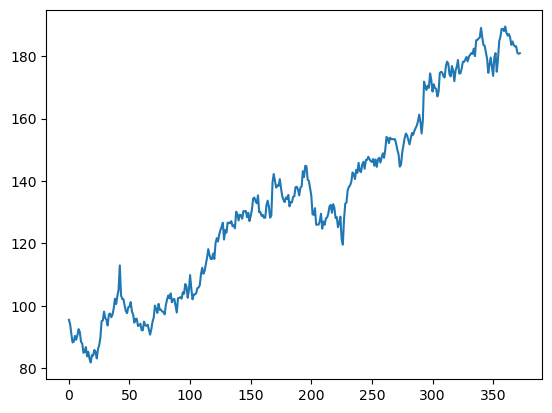

In [36]:
plt.plot(df['Close'])

In [37]:
df = df[['Date', 'Close']]

In [38]:
df

,Date,Close
0,2022-12-01,95.500000
1,2022-12-02,94.129997
2,2022-12-05,91.010002
3,2022-12-06,88.250000
4,2022-12-07,88.459999
...,...,...
368,2024-05-21,183.149994
369,2024-05-22,183.130005
370,2024-05-23,181.050003
371,2024-05-24,180.750000


In [39]:
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)

In [40]:
df['Date'] = df['Date'].apply(str_to_datetime)
df.index = df.pop('Date')

C:\Users\acer\AppData\Local\Temp\ipykernel_20988\1888069046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].apply(str_to_datetime)


In [41]:
# Adjust the initial date to be 101 days after the first date to ensure enough data for a 100-day window
dt = df.index[100]  # Start from the 101st day
curr = (datetime.datetime.now() - datetime.timedelta(days=4)).strftime('%Y-%m-%d')

In [42]:
import numpy as np
# Function to create windowed DataFrame
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=100):
    first_date = str_to_datetime(first_date_str)
    last_date  = str_to_datetime(last_date_str)

    target_date = first_date

    dates = []
    X, Y = [], []

    last_time = False
    while True:
        df_subset = dataframe.loc[:target_date].tail(n+1)

        if len(df_subset) != n+1:
            print(f'Error: Window of size {n} is too large for date {target_date}')
            return

        values = df_subset['Close'].to_numpy()
        x, y = values[:-1], values[-1]

        dates.append(target_date)
        X.append(x)
        Y.append(y)

        next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
        next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
        next_date_str = next_datetime_str.split('T')[0]
        year_month_day = next_date_str.split('-')
        year, month, day = year_month_day
        next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

        if last_time:
            break

        target_date = next_date

        if target_date == last_date:
            last_time = True

    ret_df = pd.DataFrame({})
    ret_df['Target Date'] = dates

    X = np.array(X)
    for i in range(0, n):
        X[:, i]
        ret_df[f'Target-{n-i}'] = X[:, i]

    ret_df['Target'] = Y

    return ret_df

# Get the windowed dataframe
windowed_df = df_to_windowed_df(df, dt.strftime('%Y-%m-%d'), curr, n=100)
windowed_df

C:\Users\acer\AppData\Local\Temp\ipykernel_20988\3534526038.py:48: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df[f'Target-{n-i}'] = X[:, i]
C:\Users\acer\AppData\Local\Temp\ipykernel_20988\3534526038.py:50: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ret_df['Target'] = Y


,Target Date,Target-100,Target-99,Target-98,Target-97,Target-96,Target-95,Target-94,Target-93,Target-92,...,Target-9,Target-8,Target-7,Target-6,Target-5,Target-4,Target-3,Target-2,Target-1,Target
0,2023-04-27,95.500000,94.129997,91.010002,88.250000,88.459999,90.349998,89.089996,90.550003,92.489998,...,102.510002,102.739998,102.300003,104.300003,103.809998,106.959999,106.209999,102.570000,104.980003,109.820000
1,2023-04-28,94.129997,91.010002,88.250000,88.459999,90.349998,89.089996,90.550003,92.489998,91.580002,...,102.739998,102.300003,104.300003,103.809998,106.959999,106.209999,102.570000,104.980003,109.820000,105.449997
2,2023-05-01,91.010002,88.250000,88.459999,90.349998,89.089996,90.550003,92.489998,91.580002,88.449997,...,102.300003,104.300003,103.809998,106.959999,106.209999,102.570000,104.980003,109.820000,105.449997,102.050003
3,2023-05-02,88.250000,88.459999,90.349998,89.089996,90.550003,92.489998,91.580002,88.449997,87.860001,...,104.300003,103.809998,106.959999,106.209999,102.570000,104.980003,109.820000,105.449997,102.050003,103.629997
4,2023-05-03,88.459999,90.349998,89.089996,90.550003,92.489998,91.580002,88.449997,87.860001,84.919998,...,103.809998,106.959999,106.209999,102.570000,104.980003,109.820000,105.449997,102.050003,103.629997,103.650002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2024-05-20,153.410004,153.339996,153.380005,151.940002,149.929993,148.470001,144.570007,145.240005,149.100006,...,188.759995,188.000000,189.500000,187.479996,186.570007,187.070007,185.990005,183.630005,184.699997,183.539993
268,2024-05-21,153.339996,153.380005,151.940002,149.929993,148.470001,144.570007,145.240005,149.100006,151.369995,...,188.000000,189.500000,187.479996,186.570007,187.070007,185.990005,183.630005,184.699997,183.539993,183.149994
269,2024-05-22,153.380005,151.940002,149.929993,148.470001,144.570007,145.240005,149.100006,151.369995,153.729996,...,189.500000,187.479996,186.570007,187.070007,185.990005,183.630005,184.699997,183.539993,183.149994,183.130005
270,2024-05-23,151.940002,149.929993,148.470001,144.570007,145.240005,149.100006,151.369995,153.729996,155.179993,...,187.479996,186.570007,187.070007,185.990005,183.630005,184.699997,183.539993,183.149994,183.130005,181.050003


In [43]:
# Convert windowed dataframe to dates, X, and y
def windowed_df_to_date_X_y(windowed_dataframe):
    df_as_np = windowed_dataframe.to_numpy()

    dates = df_as_np[:, 0]

    middle_matrix = df_as_np[:, 1:-1]
    X = middle_matrix.reshape((len(dates), middle_matrix.shape[1]))

    Y = df_as_np[:, -1]

    return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)
dates.shape, X.shape, y.shape

((272,), (272, 100), (272,))

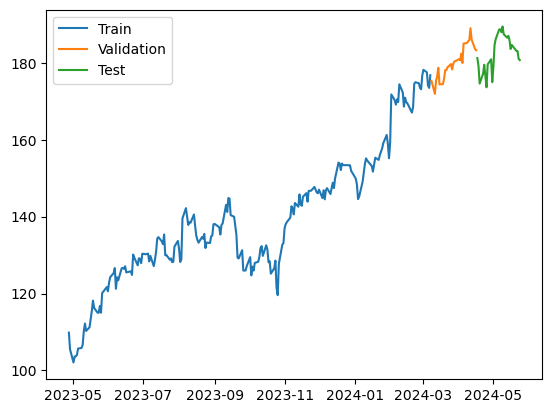

In [44]:
# Split the data into train, validation, and test sets
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]
plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [45]:
import tensorflow as tf
from tensorflow import keras

In [46]:
# Define and train the model
model = keras.Sequential([
    keras.layers.Input((100, 1)),
    tf.keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mse',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
7/7 [==============================] - 39s 1s/step - loss: 19136.2031 - mean_absolute_error: 137.2688 - val_loss: 31609.9258 - val_mean_absolute_error: 177.7417
Epoch 2/100
7/7 [==============================] - 1s 236ms/step - loss: 18722.0527 - mean_absolute_error: 135.7495 - val_loss: 31046.2676 - val_mean_absolute_error: 176.1488
Epoch 3/100
7/7 [==============================] - 1s 117ms/step - loss: 18260.3438 - mean_absolute_error: 134.0316 - val_loss: 30381.7598 - val_mean_absolute_error: 174.2524
Epoch 4/100
7/7 [==============================] - 1s 91ms/step - loss: 17712.6426 - mean_absolute_error: 131.9686 - val_loss: 29557.2402 - val_mean_absolute_error: 171.8702
Epoch 5/100
7/7 [==============================] - 1s 81ms/step - loss: 16991.6582 - mean_absolute_error: 129.1870 - val_loss: 28507.7148 - val_mean_absolute_error: 168.7890
Epoch 6/100
7/7 [==============================] - 0s 64ms/step - loss: 16001.2627 - mean_absolute_error: 125.2913 - val_loss: 27

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
# Evaluate the model
train_predictions = model.predict(X_train).flatten()
val_predictions = model.predict(X_val).flatten()
test_predictions = model.predict(X_test).flatten()

train_mse = mean_squared_error(y_train, train_predictions)
val_mse = mean_squared_error(y_val, val_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

train_mae = mean_absolute_error(y_train, train_predictions)
val_mae = mean_absolute_error(y_val, val_predictions)
test_mae = mean_absolute_error(y_test, test_predictions)

1/1 [==============================] - 0s 265ms/step


In [49]:
print(f"Window size 100 days - Train MSE: {train_mse}, Validation MSE: {val_mse}, Test MSE: {test_mse}")
print(f"Window size 100 days - Train MAE: {train_mae}, Validation MAE: {val_mae}, Test MAE: {test_mae}")

Window size 100 days - Train MSE: 9.366714477539062, Validation MSE: 29.49477767944336, Test MSE: 42.80381393432617
Window size 100 days - Train MAE: 2.3300819396972656, Validation MAE: 4.606039524078369, Test MAE: 5.676858425140381


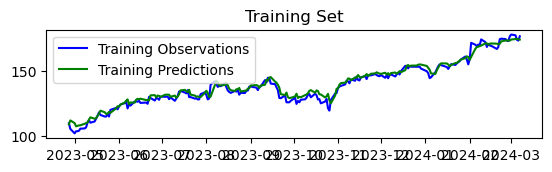

In [50]:
# Training set
plt.subplot(3, 1, 1)
plt.plot(dates_train, y_train, label='Training Observations', color='blue')
plt.plot(dates_train, train_predictions, label='Training Predictions', color='green')
plt.title('Training Set')
plt.legend()

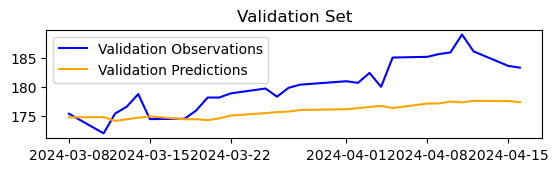

In [51]:
# Validation set
plt.subplot(3, 1, 2)
plt.plot(dates_val, y_val, label='Validation Observations', color='blue')
plt.plot(dates_val, val_predictions, label='Validation Predictions', color='orange')
plt.title('Validation Set')
plt.legend()

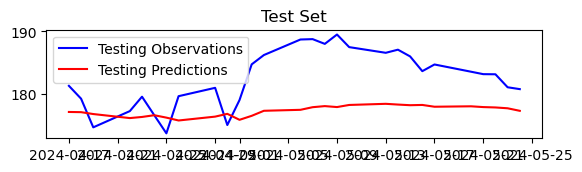

In [52]:
# Test set
plt.subplot(3, 1, 3)
plt.plot(dates_test, y_test, label='Testing Observations', color='blue')
plt.plot(dates_test, test_predictions, label='Testing Predictions', color='red')
plt.title('Test Set')
plt.legend()

In [53]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>